<a href="https://colab.research.google.com/github/JiminGong/classify-for-deeplearn/blob/main/class17.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import os
import cv2
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import keras
from tqdm import tqdm
from keras.callbacks import EarlyStopping,ModelCheckpoint
from sklearn.metrics import confusion_matrix , accuracy_score
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import glob
import pandas as pan
import matplotlib.pyplot as plotter
import warnings
warnings.filterwarnings('ignore')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
%cd /content/drive/MyDrive/

/content/drive/MyDrive


In [ ]:
!unzip "garbage_classification.zip"

Archive:  garbage_classification.zip
  inflating: aerosol can/1 (1).png   
  inflating: aerosol can/1 (10).png  
  inflating: aerosol can/1 (100).png  
  inflating: aerosol can/1 (101).png  
  inflating: aerosol can/1 (102).png  
  inflating: aerosol can/1 (103).png  
  inflating: aerosol can/1 (104).png  
  inflating: aerosol can/1 (105).png  
  inflating: aerosol can/1 (106).png  
  inflating: aerosol can/1 (107).png  
  inflating: aerosol can/1 (108).png  
  inflating: aerosol can/1 (109).png  
  inflating: aerosol can/1 (11).png  
  inflating: aerosol can/1 (110).png  
  inflating: aerosol can/1 (111).png  
  inflating: aerosol can/1 (112).png  
  inflating: aerosol can/1 (113).png  
  inflating: aerosol can/1 (114).png  
  inflating: aerosol can/1 (115).png  
  inflating: aerosol can/1 (116).png  
  inflating: aerosol can/1 (117).png  
  inflating: aerosol can/1 (118).png  
  inflating: aerosol can/1 (119).png  
  inflating: aerosol can/1 (12).png  
 extracting: aerosol can/1 (120

In [ ]:
%cd /content/drive/MyDrive/garbage_classification/

/content/drive/MyDrive/garbage_classification


In [ ]:
image_data= '/content/drive/MyDrive/garbage_classification'
pd.DataFrame(os.listdir(image_data),columns=['Files_Name'])

,Files_Name
0,aerosol can
1,battery
2,beverage carton
3,can
4,cardboard
5,clothes
6,glass
7,magazines
8,news paper
9,office paper


In [ ]:
files = [i for i in glob.glob(image_data + "//*//*")]
np.random.shuffle(files)
labels = [os.path.dirname(i).split("/")[-1] for i in files]
data = zip(files, labels)
dataframe = pan.DataFrame(data, columns = ["Image", "Label"])
dataframe

,Image,Label
0,/content/drive/MyDrive/garbage_classification/...,plastic bottle
1,/content/drive/MyDrive/garbage_classification/...,shoses
2,/content/drive/MyDrive/garbage_classification/...,news paper
3,/content/drive/MyDrive/garbage_classification/...,cardboard
4,/content/drive/MyDrive/garbage_classification/...,plastic bottle
...,...,...
9599,/content/drive/MyDrive/garbage_classification/...,glass
9600,/content/drive/MyDrive/garbage_classification/...,magazines
9601,/content/drive/MyDrive/garbage_classification/...,aerosol can
9602,/content/drive/MyDrive/garbage_classification/...,plastic bag


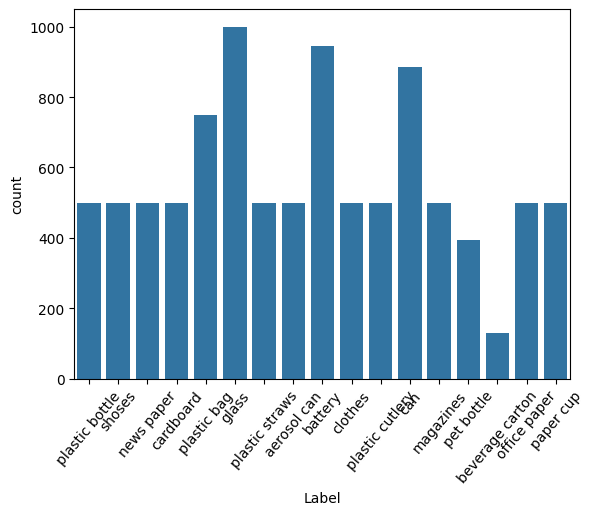

In [ ]:
sns.countplot(x = dataframe["Label"])
plotter.xticks(rotation = 50);

In [ ]:
train_data_dir =image_data
batch_size = 128                           # de 32 para 128
target_size = (224,224)
validation_split = 0.2

In [ ]:
train= tf.keras.preprocessing.image_dataset_from_directory(
    train_data_dir,
    validation_split=validation_split,
    subset="training",
    seed=50,                                                         # de 100 para 50
    image_size=target_size,
    batch_size=batch_size,
)
validation= tf.keras.preprocessing.image_dataset_from_directory(
    train_data_dir,
    validation_split=validation_split,
    subset="validation",
    seed=100,                                                         # de 200 para 100
    image_size=target_size,
    batch_size=batch_size,
)

Found 9604 files belonging to 17 classes.
Using 7684 files for training.
Found 9604 files belonging to 17 classes.
Using 1920 files for validation.


In [ ]:
class_names = train.class_names
class_names

['aerosol can',
 'battery',
 'beverage carton',
 'can',
 'cardboard',
 'clothes',
 'glass',
 'magazines',
 'news paper',
 'office paper',
 'paper cup',
 'pet bottle',
 'plastic bag',
 'plastic bottle',
 'plastic cutlery',
 'plastic straws',
 'shoses']

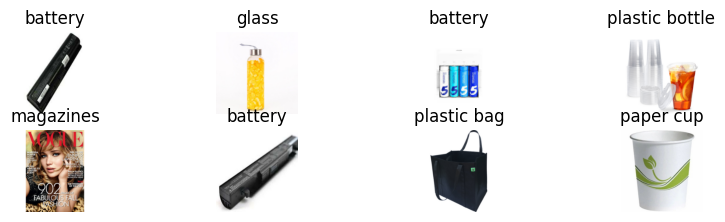

In [ ]:
plt.figure(figsize=(10, 10))
for images, labels in train.take(1):
    for i in range(8):
        ax = plt.subplot(8, 4, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")

모델 요약:


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ efficientnetv2-b1 (Functional)       │ (None, 7, 7, 1280)          │       6,931,124 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ reshape_3 (Reshape)                  │ (None, 62720)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 62720)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 17)                  │       1,066,257 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 7,997,381 (30.51 MB)

 Trainable params: 1,066,257 (4.07 MB)

 Non-trainable params: 6,931,124 (26.44 MB)

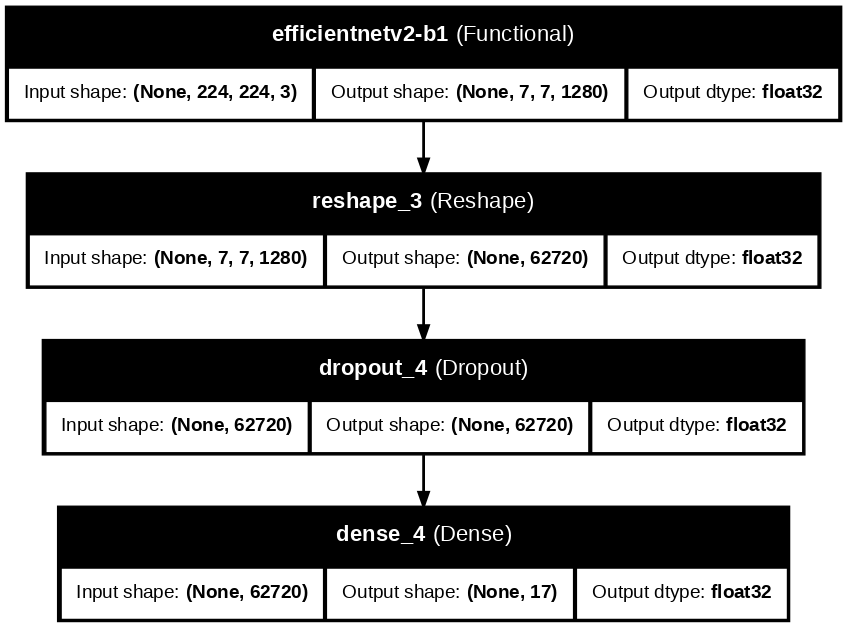

In [ ]:
from tensorflow import keras
import tensorflow as tf

# EfficientNetV2B1 모델 불러오기
base_model = keras.applications.EfficientNetV2B1(input_shape=(224, 224, 3), include_top=False, weights='imagenet')
base_model.trainable = False

# Sequential 모델 구성
keras_model = keras.models.Sequential()
keras_model.add(base_model)

# Reshape 레이어 추가 (Flatten 전에)
keras_model.add(keras.layers.Reshape((7 * 7 * 1280,)))  # 7x7x1280로 변경
keras_model.add(keras.layers.Dropout(0.5))
keras_model.add(keras.layers.Dense(17, activation=tf.nn.softmax))  # 17 classes

# 모델 빌드 및 요약
keras_model.build(input_shape=(None, 224, 224, 3))
print("모델 요약:")
keras_model.summary()

# 모델 구조 시각화
tf.keras.utils.plot_model(keras_model, to_file='model.png', show_shapes=True, show_layer_names=True, show_dtype=True, dpi=100)


In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint

checkpoint = ModelCheckpoint("Classification17.keras", save_best_only=True)


In [ ]:
early_stopping =EarlyStopping(patience=10, restore_best_weights=True)    # patience de 5 para 10

In [ ]:
keras_model.compile(optimizer ='Adam',loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
hist = keras_model.fit(train, epochs=10, validation_data=validation, callbacks=[checkpoint, early_stopping])


Epoch 1/10
61/61 ━━━━━━━━━━━━━━━━━━━━ 2387s 39s/step - accuracy: 0.7134 - loss: 1.5383 - val_accuracy: 0.9583 - val_loss: 0.1853
Epoch 2/10
61/61 ━━━━━━━━━━━━━━━━━━━━ 982s 15s/step - accuracy: 0.9539 - loss: 0.2235 - val_accuracy: 0.9760 - val_loss: 0.1638
Epoch 3/10
61/61 ━━━━━━━━━━━━━━━━━━━━ 998s 16s/step - accuracy: 0.9736 - loss: 0.1455 - val_accuracy: 0.9792 - val_loss: 0.1788
Epoch 4/10
61/61 ━━━━━━━━━━━━━━━━━━━━ 959s 16s/step - accuracy: 0.9822 - loss: 0.1113 - val_accuracy: 0.9823 - val_loss: 0.1731
Epoch 5/10
61/61 ━━━━━━━━━━━━━━━━━━━━ 927s 15s/step - accuracy: 0.9818 - loss: 0.1053 - val_accuracy: 0.9781 - val_loss: 0.2009
Epoch 6/10
61/61 ━━━━━━━━━━━━━━━━━━━━ 933s 14s/step - accuracy: 0.9824 - loss: 0.1074 - val_accuracy: 0.9807 - val_loss: 0.2020
Epoch 7/10
61/61 ━━━━━━━━━━━━━━━━━━━━ 946s 15s/step - accuracy: 0.9875 - loss: 0.0836 - val_accuracy: 0.9833 - val_loss: 0.2362
Epoch 8/10
61/61 ━━━━━━━━━━━━━━━━━━━━ 899s 14s/step - accuracy: 0.9863 - loss: 0.1064 - val_accuracy: 0

In [ ]:
score, acc = keras_model.evaluate(validation)
print('Test Loss =', score)
print('Test Accuracy =', acc)

15/15 ━━━━━━━━━━━━━━━━━━━━ 182s 12s/step - accuracy: 0.9856 - loss: 0.1305
Test Loss = 0.16165009140968323
Test Accuracy = 0.984375


In [ ]:
hist_=pd.DataFrame(hist.history)
hist_

,accuracy,loss,val_accuracy,val_loss
0,0.827954,0.975537,0.955208,0.207822
1,0.952108,0.210880,0.971875,0.180589
2,0.975013,0.132268,0.984375,0.161650
3,0.981780,0.123455,0.981250,0.182424
4,0.984123,0.105663,0.983333,0.165231
5,0.987376,0.089623,0.981771,0.188506
6,0.985685,0.105926,0.982813,0.183696
7,0.985815,0.116705,0.981771,0.215881
8,0.983472,0.126170,0.981250,0.230413
9,0.976445,0.189992,0.981771,0.246207


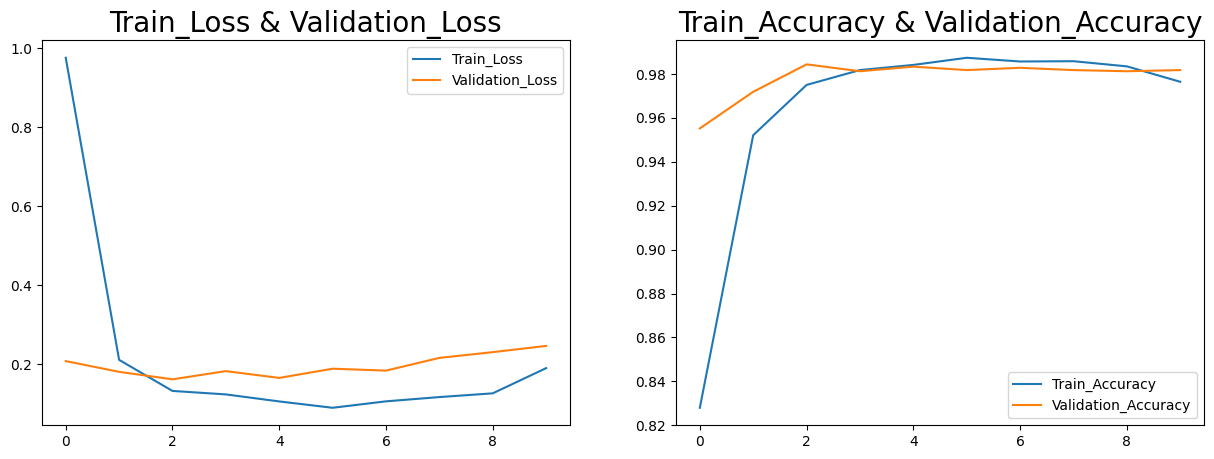

In [ ]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.plot(hist_['loss'],label='Train_Loss')
plt.plot(hist_['val_loss'],label='Validation_Loss')
plt.title('Train_Loss & Validation_Loss',fontsize=20)
plt.legend()
plt.subplot(1,2,2)
plt.plot(hist_['accuracy'],label='Train_Accuracy')
plt.plot(hist_['val_accuracy'],label='Validation_Accuracy')
plt.title('Train_Accuracy & Validation_Accuracy',fontsize=20)
plt.legend()

In [ ]:
X_val,y_val,y_pred=[],[],[]
for images, labels in validation:
    y_val.extend(labels.numpy())
    X_val.extend(images.numpy())
predictions=keras_model.predict(np.array(X_val))
for i in predictions:
    y_pred.append(np.argmax(i))
df=pd.DataFrame()
df['Actual'],df['Prediction']=y_val,y_pred
df

60/60 ━━━━━━━━━━━━━━━━━━━━ 141s 2s/step


,Actual,Prediction
0,1,1
1,0,0
2,4,4
3,0,0
4,2,2
...,...,...
1915,16,16
1916,15,15
1917,3,3
1918,14,14


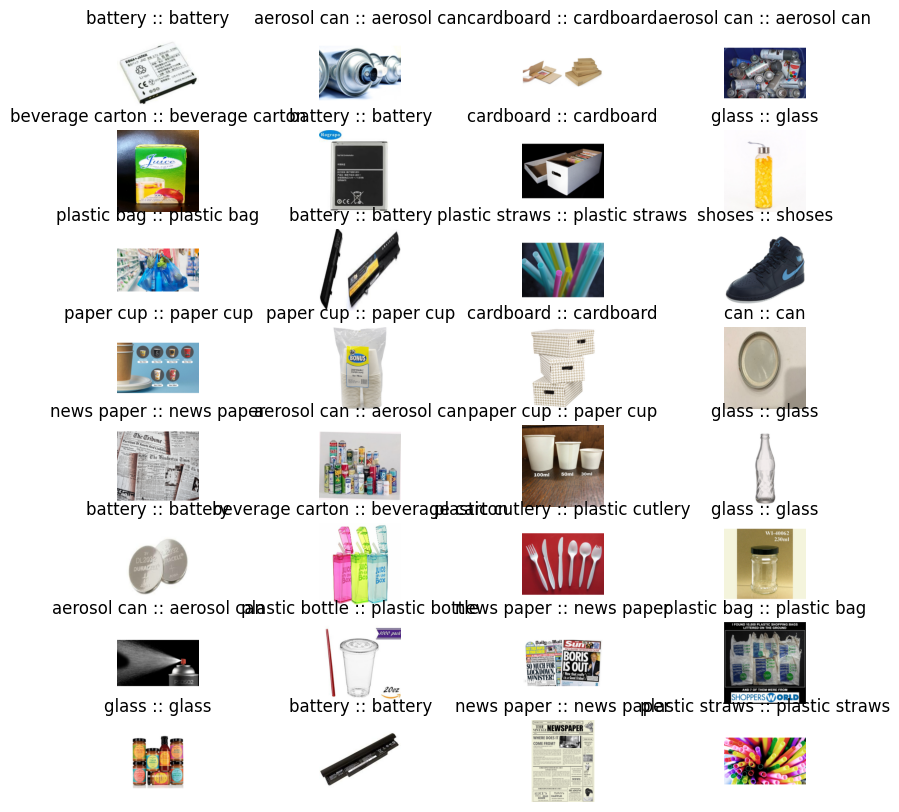

In [ ]:
plt.figure(figsize=(10,10))
for i in range(32):
    ax = plt.subplot(8, 4, i + 1)
    plt.imshow(X_val[i].astype("uint8"))
    plt.title(f'{class_names[y_val[i]]} :: {class_names[y_pred[i]]}')
    plt.axis("off")

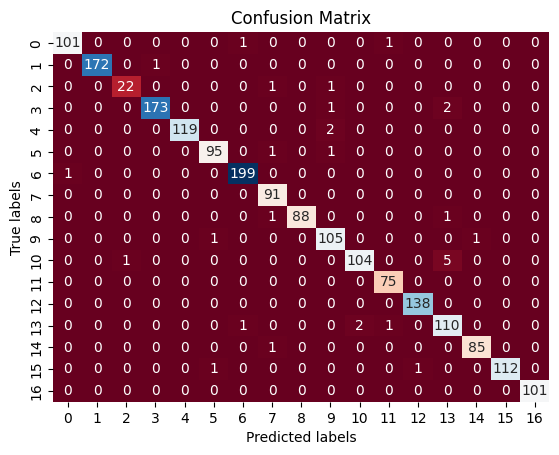

array([[101,   0,   0,   0,   0,   0,   1,   0,   0,   0,   0,   1,   0,
          0,   0,   0,   0],
       [  0, 172,   0,   1,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0],
       [  0,   0,  22,   0,   0,   0,   0,   1,   0,   1,   0,   0,   0,
          0,   0,   0,   0],
       [  0,   0,   0, 173,   0,   0,   0,   0,   0,   1,   0,   0,   0,
          2,   0,   0,   0],
       [  0,   0,   0,   0, 119,   0,   0,   0,   0,   2,   0,   0,   0,
          0,   0,   0,   0],
       [  0,   0,   0,   0,   0,  95,   0,   1,   0,   1,   0,   0,   0,
          0,   0,   0,   0],
       [  1,   0,   0,   0,   0,   0, 199,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,  91,   0,   0,   0,   0,   0,
          0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   1,  88,   0,   0,   0,   0,
          1,   0,   0,   0],
       [  0,   0,   0,   0,   0,   1,   0,   0,   0, 105,   0,   0,   0,
         

In [ ]:
ax= plt.subplot()
CM = confusion_matrix(y_val,y_pred)
sns.heatmap(CM, annot=True, fmt='g', ax=ax,cbar=False,cmap='RdBu')
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
plt.show()
CM

In [ ]:
Acc = accuracy_score(y_val,y_pred)
print("accuracy is: {0:.4f}%".format(Acc * 100))

accuracy is: 98.4375%
